# **Importing Necessary Libraries**

In [50]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input,decode_predictions

# **Downloading the Tensorflow Flower Dataset**

In [2]:
data = tf.keras.utils.get_file(origin = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
                               cache_dir='.',
                               untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
dataset = Path("/content/datasets/flower_photos.tgz/flower_photos")
flowers = []
for i in dataset.iterdir():
  if i.is_dir() and not i.name.startswith("."):
      flowers.append(i)
flowers

[PosixPath('/content/datasets/flower_photos.tgz/flower_photos/sunflowers'),
 PosixPath('/content/datasets/flower_photos.tgz/flower_photos/daisy'),
 PosixPath('/content/datasets/flower_photos.tgz/flower_photos/roses'),
 PosixPath('/content/datasets/flower_photos.tgz/flower_photos/tulips'),
 PosixPath('/content/datasets/flower_photos.tgz/flower_photos/dandelion')]

# **Displaying Sample Data**

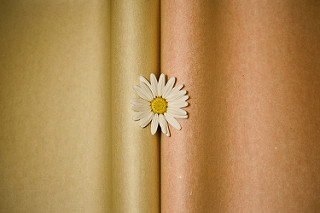

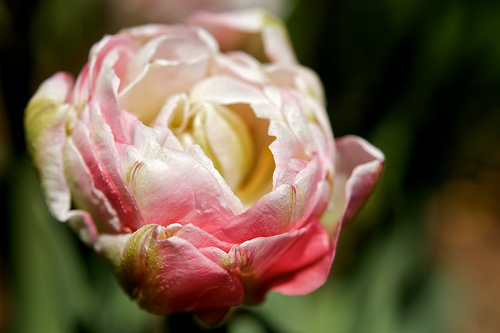

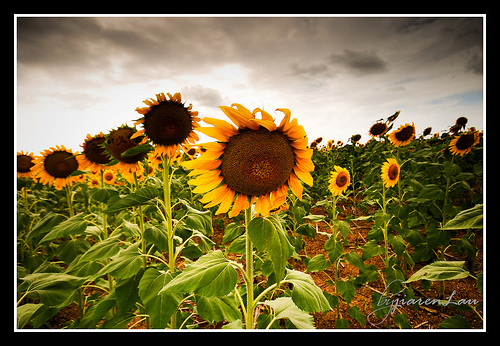

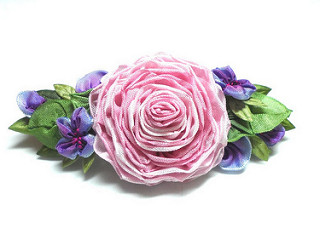

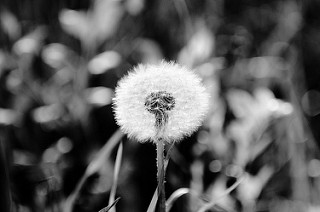

In [ ]:
for i in flowers:
  c = 0
  for j in i.glob("*jpg"):
    obj = Image.open(str(j))
    display(obj)
    c = c + 1
    if c==1 :
      break


# **Reading the Images in the form of 3D matrices (R,G,B)**

In [4]:
dic = {}
for i,j in enumerate(flowers):
  dic[i] = j.name

X_data,Y_data = [],[]

for labels,i in enumerate(flowers):
  for j in i.glob("*.jpg"):
    img = cv2.cvtColor(cv2.imread(j), cv2.COLOR_BGR2RGB)
    X_data.append(img)

    Y_data.append(labels)

In [5]:
Y_data = np.array(Y_data)
dic

{0: 'sunflowers', 1: 'daisy', 2: 'roses', 3: 'tulips', 4: 'dandelion'}

#**Data Preprocessing : Setting all the Images to be of size 256 x 256**

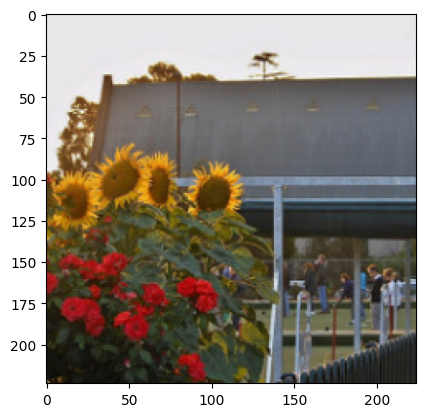

In [8]:
X_data_resized = [cv2.resize(i,(224,224),interpolation=cv2.INTER_AREA) for i in X_data]
X_data_resized = np.array(X_data_resized)
plt.imshow(X_data_resized[0])


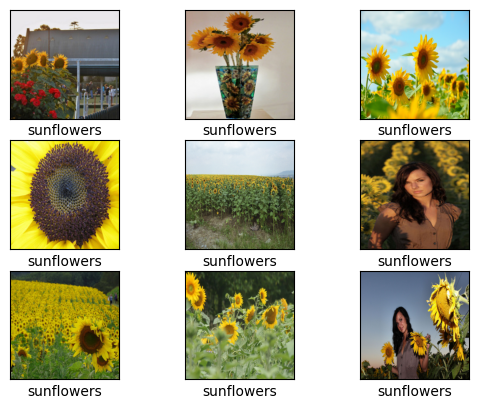

In [47]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_data_resized[i])
  plt.xlabel(dic[Y_data[i]])
  plt.xticks([])
  plt.yticks([])


# **Creating a CNN**

In [65]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomRotation(factor = 0.3),
    tf.keras.layers.RandomZoom(0.2),])

model_cnn = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(224,224,3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1.0/255),    #Normalizing the data within 0 to 1

    #Convolutions and Max Pooling
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',strides=1,padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',strides=1,padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',strides=1,padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',strides=1,padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.5), # Added Dropout layer
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])

model_cnn.compile(optimizer='adam',loss = "sparse_categorical_crossentropy",metrics=['accuracy'])

In [66]:
model_cnn.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_27 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │     2,508,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,611,645 (9.96 MB)

 Trainable params: 2,611,645 (9.96 MB)

 Non-trainable params: 0 (0.00 B)

# **Creating a Custom Model using pre-trained MobileNetV2 Model**

In [67]:
model = MobileNetV2(
    weights = 'imagenet',
    include_top = True
)

In [60]:
p = model.predict(preprocess_input(X_data_resized[1001:1003]))
output = [i[0][1] for i in decode_predictions(p,top=1)]
print(output)
print(dic[Y_data[1000]],dic[Y_data[1001]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
['plastic_bag', 'daisy']
daisy daisy


array([[[  0,  48,  89],
        [  0,  48,  89],
        [  0,  48,  89],
        ...,
        [141,  92,   0],
        [147,  98,   5],
        [149,  99,   4]],

       [[  0,  48,  89],
        [  0,  48,  89],
        [  0,  48,  89],
        ...,
        [138,  91,   1],
        [140,  93,   1],
        [138,  91,   0]],

       [[  0,  48,  89],
        [  0,  48,  89],
        [  0,  48,  89],
        ...,
        [140,  95,   4],
        [135,  89,   1],
        [128,  84,   0]],

       ...,

       [[  0,  62, 111],
        [  0,  62, 111],
        [  0,  62, 111],
        ...,
        [  0,  66, 121],
        [  0,  67, 122],
        [  0,  67, 122]],

       [[  0,  62, 111],
        [  0,  62, 111],
        [  0,  62, 111],
        ...,
        [  0,  67, 122],
        [  0,  67, 122],
        [  0,  67, 122]],

       [[  0,  62, 111],
        [  0,  62, 111],
        [  0,  62, 111],
        ...,
        [  0,  67, 122],
        [  0,  67, 122],
        [  0,  67, 122]]], dtype=uint8)
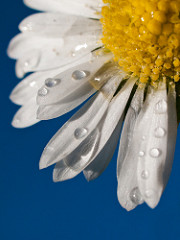

In [61]:
X_data[1001] #Plastic bag


# **Steps to Create Custom Model**

1.   Creating the Input Layer.
2.   Creating the connections(weights) between Input Layer and Hidden Layer through Pre-Processing.


1.   Connecting the Hidden Layer with the weights created in step - 2.


1.   Flatten the Structure created so far before connecting the Dense Output Layer.


2.   Creating the Output Layer and immediately connecting to the structure created in step 3.


1.   Creating my Custom Model by connecting the Input Layer in Step-1 and Output Layer in step - 4 .







In [68]:
base_model = MobileNetV2(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

# this line freezes the weight from being updated whereas training = false disables BatchNorm & Dropout behavior(does NOT freeze weights)

base_model.trainable = False

"""inputs = tf.keras.Input(shape = (224,224,3))  # creating the Input Layer
x = preprocess_input(inputs) # Preprocessing the hidden layers in pretrained model to create weights to connect to Input Layer
x = base_model(x,training = False) # Connecting the weights(connections to input) to the Frozen Hidden Layers
x = tf.keras.layers.Flatten()(x) #Flattening the structure created sor far before proceeding to Output Layer
outputs = tf.keras.layers.Dense(5,activation='softmax')(x) #Creating the output layer connected with Hidden Layers in x
model = tf.keras.Model(inputs,outputs)"""

#Data Augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomRotation(factor = 0.3),
    tf.keras.layers.RandomZoom(0.2),])

model = tf.keras.Sequential([

    tf.keras.layers.Input(shape = (224,224,3)),
    data_augmentation,
    tf.keras.layers.Lambda(preprocess_input),  # Rescaling the input between 1 to -1 suitable for MobileNet
    base_model,

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5,activation='softmax')

])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [83]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_29 (Sequential)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_9 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │     6,272,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,530,589 (32.54 MB)

 Trainable params: 6,272,605 (23.93 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

# ***Splitting the dataset into Training and Testing Dataset and again Splitting Training Data into Actual Training and Validation Data***

In [69]:
from sklearn.model_selection import train_test_split
trainX, X_test, trainY, Y_test = train_test_split(
    X_data_resized,
    Y_data,
    test_size=0.1,
    stratify=Y_data,
    random_state=45
)
X_train, X_val, Y_train, Y_val = train_test_split(
    trainX,
    trainY,
    test_size=0.2,
    stratify=trainY,
    random_state=45
)


# ***Training the CNN for 100 Epochs and 32 batches***

In [71]:
model_cnn.fit(X_train,Y_train,epochs=100,validation_data=(X_val,Y_val))

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4749 - loss: 1.2389 - val_accuracy: 0.5461 - val_loss: 1.1345
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4962 - loss: 1.1824 - val_accuracy: 0.5492 - val_loss: 1.0731
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5640 - loss: 1.0664 - val_accuracy: 0.5855 - val_loss: 1.0132
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5814 - loss: 1.0438 - val_accuracy: 0.6248 - val_loss: 0.9077
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.6069 - loss: 0.9923 - val_accuracy: 0.6248 - val_loss: 0.8993
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5965 - loss: 0.9892 - val_accuracy: 0.6702 - val_loss: 0.8384
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6125 - loss: 0.9391 - val_accuracy: 0.6475 - val_loss: 0.8690
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6277 - loss: 0.9288 - val_accuracy: 0.

In [79]:
model_cnn.evaluate(X_test,Y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8179 - loss: 0.5034


[0.5669628977775574, 0.8201634883880615]

In [80]:
results = model_cnn.predict(X_test)
predictions = [np.argmax(results[i]) for i in range(len(X_test))]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [74]:
from sklearn.metrics import classification_report,confusion_matrix

# ***Training the Custom pretrained model for 100 Epochs with 32 batches***

In [41]:
model.fit(X_train,Y_train,epochs = 100 , validation_data=(X_val,Y_val))

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.5105 - loss: 4.3397 - val_accuracy: 0.8290 - val_loss: 0.4873
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.7642 - loss: 0.6727 - val_accuracy: 0.8487 - val_loss: 0.4441
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.8046 - loss: 0.5528 - val_accuracy: 0.8759 - val_loss: 0.4076
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.8028 - loss: 0.5296 - val_accuracy: 0.8654 - val_loss: 0.4501
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.8004 - loss: 0.6010 - val_accuracy: 0.8563 - val_loss: 0.4128
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.8171 - loss: 0.5083 - val_accuracy: 0.8669 - val_loss: 0.4266
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.8308 - loss: 0.4902 - val_accuracy: 0.8517 - val_loss: 0.5602
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.8409 - loss: 0.4567 - val_accuracy: 0

In [43]:
model.evaluate(X_test,Y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8732 - loss: 0.4184


[0.45886948704719543, 0.8855586051940918]

In [44]:
results = model.predict(X_test)
predictions = [np.argmax(results[i]) for i in range(len(X_test))]

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 275ms/step


## **Classification Report for CNN Model**

In [81]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        70
           1       0.81      0.89      0.85        63
           2       0.72      0.75      0.73        64
           3       0.83      0.65      0.73        80
           4       0.84      0.89      0.86        90

    accuracy                           0.82       367
   macro avg       0.82      0.82      0.82       367
weighted avg       0.82      0.82      0.82       367



<Axes: >

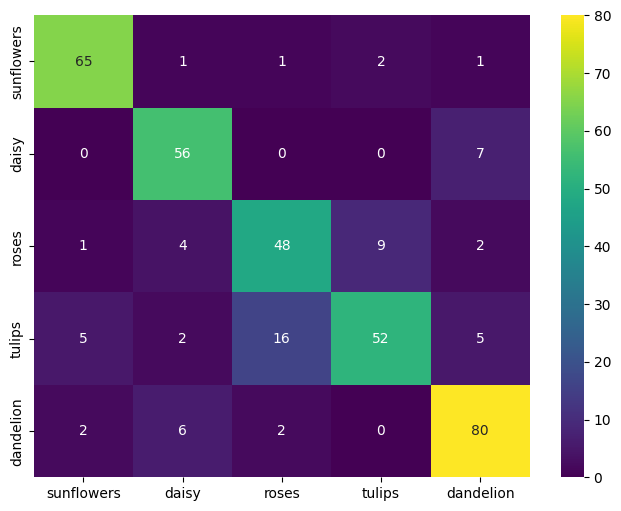

In [82]:
cm = confusion_matrix(Y_test,predictions)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True,cmap="viridis",xticklabels = dic.values(),yticklabels=dic.values())

# **Classification Report for Pre-trained Model**

In [45]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        70
           1       0.95      0.89      0.92        63
           2       0.77      0.89      0.83        64
           3       0.83      0.80      0.82        80
           4       0.94      0.93      0.94        90

    accuracy                           0.89       367
   macro avg       0.89      0.89      0.89       367
weighted avg       0.89      0.89      0.89       367



<Axes: >

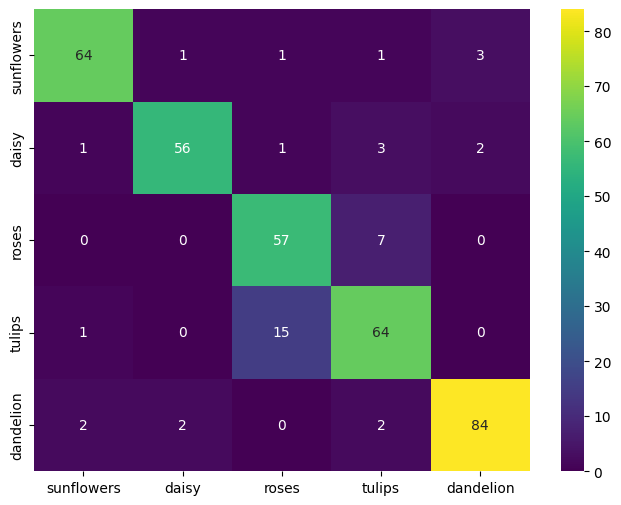

In [46]:
cm = confusion_matrix(Y_test,predictions)
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True,cmap="viridis",xticklabels = dic.values(),yticklabels=dic.values())